In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


In [3]:
def plot_decision_boundary(clf, X, y, ax=None, title=None):
    h = .02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolor='k')
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    if title: 
        ax.set_title(title)

In [4]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

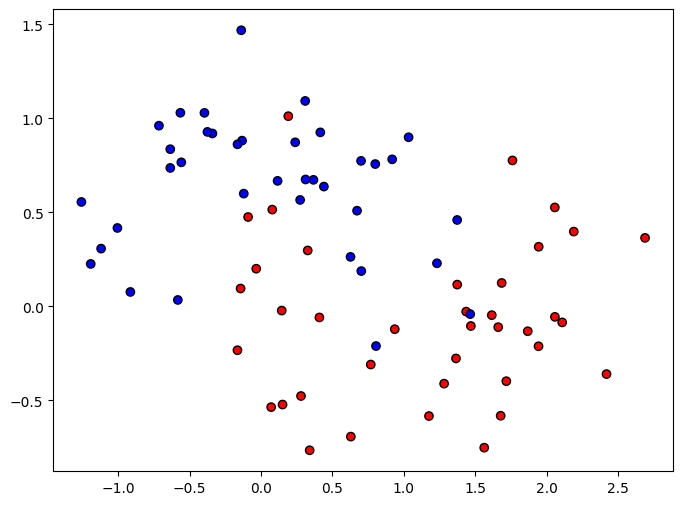

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(x_train[:,0], x_train[:,1],c=y_train,cmap=plt.cm.bwr,edgecolors='k')
plt.show()

In [44]:
mlp_single = MLPClassifier(hidden_layer_sizes=[20,15,25,5], max_iter=200
                           , solver = 'lbfgs', random_state=0)

mlp_single.fit(x_train,y_train)

d:\CA-Makeen\week9\learning_regression\my_virtual_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=[20, 15, 25, 5], random_state=0,
              solver='lbfgs')

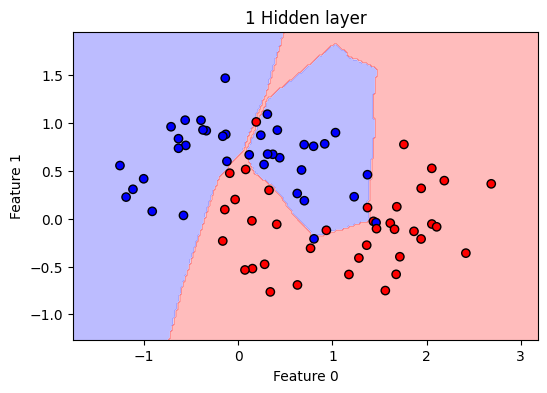

In [45]:
plt.figure(figsize=(6,4))
plot_decision_boundary(mlp_single,x_train,y_train,title='1 Hidden layer')
plt.show()

In [26]:
# adding more units
mlp = MLPClassifier(hidden_layer_sizes=[100,500,1110,5000],max_iter=200
                    , solver= 'sgd',random_state=0)

mlp.fit(x_train,y_train)

d:\CA-Makeen\week9\learning_regression\my_virtual_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[100, 500, 1110, 5000], random_state=0,
              solver='sgd')

<function matplotlib.pyplot.show(close=None, block=None)>

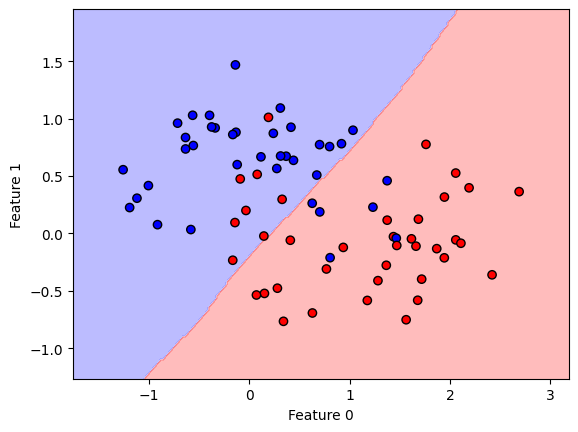

In [27]:
plot_decision_boundary(mlp,x_train,y_train,title='')
plt.show